In [1]:
from pathlib import Path
import yaml
from IPython.display import Image

from data_utils import load_results, convert_test_scores_to_sample_scores
from eval import calculate_cf_matrix, plot_cf_matrix

# Load data

In [2]:
# import parameters
import_file_path = Path('./data/2022-11-09 C61_BV_Results.txt')
image_folder_column = 'Camera_2.Reg Image Pathname'
image_name_column = 'Camera_2.Reg Image Filename'
score_column = '700 M summary stopfen defect.Failed'
category_map = {
    'Airline': 0, 
    'Beschaedigung Abweichung am Glas SW': 0, 
    'Beschaedigung Abweichung am Stopfen': 0, 
    'Beschaedigung Kuchenbereich': 0, 
    'Faser am Stopfen': 1, 
    'Good': 0, 
    'Kratzer Seitenwand': 0, 
    'Lyophilisat zw Stopfen und Vialhals': 0, 
    'Partikel am Stopfen': 0, 
    'Punkt Mark am Stopfen': 1, 
    'Verschmutzung Abrieb am Glas': 0, 
    'Verschmutzung am Stopfen': 0
}

# import results.txt file and extract information from file names 
df_results_image_based = load_results(import_file_path, image_folder_column, image_name_column, score_column, category_map)
df_results_image_based

,image_folder,image_name,category,sample,revolution,sequence,prediction,truth
0,F:\2022-09-19_Musteraufnahme_vor_Ort\C61 Stopf...,Image_Stopfen_0001_001_01.bmp,Airline,1,1,1,0,0
1,F:\2022-09-19_Musteraufnahme_vor_Ort\C61 Stopf...,Image_Stopfen_0001_001_02.bmp,Airline,1,1,2,0,0
2,F:\2022-09-19_Musteraufnahme_vor_Ort\C61 Stopf...,Image_Stopfen_0001_001_03.bmp,Airline,1,1,3,0,0
3,F:\2022-09-19_Musteraufnahme_vor_Ort\C61 Stopf...,Image_Stopfen_0001_001_04.bmp,Airline,1,1,4,0,0
4,F:\2022-09-19_Musteraufnahme_vor_Ort\C61 Stopf...,Image_Stopfen_0001_001_05.bmp,Airline,1,1,5,0,0
...,...,...,...,...,...,...,...,...
89995,F:\2022-09-19_Musteraufnahme_vor_Ort\C61 Stopf...,Image_Stopfen_0075_010_06.bmp,Verschmutzung am Stopfen,75,10,6,0,0
89996,F:\2022-09-19_Musteraufnahme_vor_Ort\C61 Stopf...,Image_Stopfen_0075_010_07.bmp,Verschmutzung am Stopfen,75,10,7,0,0
89997,F:\2022-09-19_Musteraufnahme_vor_Ort\C61 Stopf...,Image_Stopfen_0075_010_08.bmp,Verschmutzung am Stopfen,75,10,8,0,0
89998,F:\2022-09-19_Musteraufnahme_vor_Ort\C61 Stopf...,Image_Stopfen_0075_010_09.bmp,Verschmutzung am Stopfen,75,10,9,0,0


In [3]:
# save new data frame to csv file
path_image_based_csv = r'C:\Users\1699\Repositories\ai_results_viz\SVIM_export\image_based_cf_matrix.csv'
df_results_image_based.to_csv(path_image_based_csv)

# Image-based evaluation

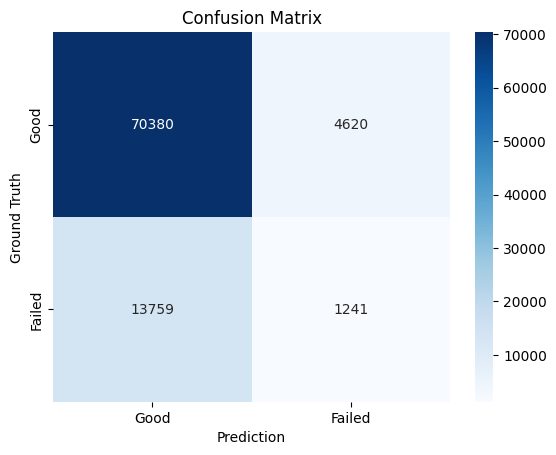

In [4]:
# evaluation parameters
prediction_class_to_value_map = {'Good': 0, 'Failed': 1}
prediction_classes = ['Good', 'Failed']

# creating confusion matrix
y_true = df_results_image_based.truth
y_pred = df_results_image_based.prediction
cf_matrix = calculate_cf_matrix(y_true, y_pred, prediction_class_to_value_map, prediction_classes)

# plotting and saving confusion matrix
workspace_path = Path(r'C:\Users\1699\Repositories\ai_results_viz\SVIM_export')
save_path_cf_matrix = workspace_path / 'image_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, prediction_classes)

# Sample-based evaluation

In [5]:
df_results_sample_based = convert_test_scores_to_sample_scores(df_results_image_based)
df_results_sample_based

prediction  truth
category                 sample revolution                   
Airline                  1      1                    0      0
                                2                    0      0
                                3                    0      0
                                4                    0      0
                                5                    0      0
...                                                ...    ...
Verschmutzung am Stopfen 75     6                    0      0
                                7                    0      0
                                8                    0      0
                                9                    0      0
                                10                   1      0

[8750 rows x 2 columns]

In [6]:
# save sample based data frame to csv file
save_path_sample_based_csv= workspace_path / 'sample_based_test_scores.csv'
df_results_sample_based.to_csv(save_path_sample_based_csv)

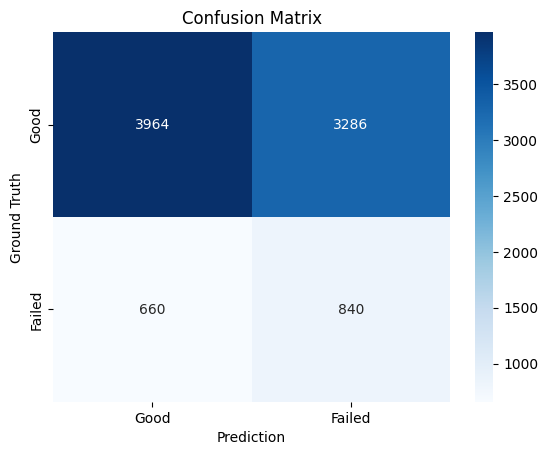

In [7]:
# creating confusion matrix
y_true = df_results_sample_based.truth
y_pred = df_results_sample_based.prediction
cf_matrix = calculate_cf_matrix(y_true, y_pred, prediction_class_to_value_map, prediction_classes)

# plotting and saving confusion matrix
save_path_cf_matrix = workspace_path / 'sample_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, prediction_classes)